In [ ]:
# ============================================
# 🧠 E-COMMERCE ANALYSIS DASHBOARD
# ============================================

In [ ]:
# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Make charts look clean
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# 2️⃣ Load CSV Files
customers = pd.read_csv(r"C:\Users\umers\Downloads\customers.csv")
products = pd.read_csv(r"C:\Users\umers\Downloads\products.csv")
orders = pd.read_csv(r"C:\Users\umers\Downloads\orders.csv")
ratings = pd.read_csv(r"C:\Users\umers\Downloads\ratings.csv")

In [ ]:
# 3️⃣ Merge DataFrames
orders_products = pd.merge(orders, products, on="product_id", how="left")
orders_full = pd.merge(orders_products, customers, on="customer_id", how="left")
orders_ratings = pd.merge(orders_full, ratings, on=["customer_id", "product_id"], how="left")


In [ ]:
# 4️⃣ Feature Engineering
orders_ratings["order_date"] = pd.to_datetime(orders_ratings["order_date"])
orders_ratings["total_amount"] = orders_ratings["price"] * orders_ratings["quantity"]

In [ ]:
# 5️⃣ Basic Metrics
total_sales = orders_ratings["total_amount"].sum()
unique_customers = orders_ratings["customer_id"].nunique()
total_orders = orders_ratings["order_id"].nunique()
aov = orders_ratings.groupby("order_id")["total_amount"].sum().mean()

print(f"💰 Total Sales Revenue: {total_sales:,.2f}")
print(f"🧍 Unique Customers: {unique_customers}")
print(f"🧾 Total Orders: {total_orders}")
print(f"📊 Average Order Value (AOV): {aov:,.2f}")


In [ ]:
# ============================================
# 📈 6️⃣ Visualization Dashboards
# ============================================


In [ ]:
# --- Sales by Category ---
sales_by_category = (
    orders_ratings.groupby("category")["total_amount"].sum().sort_values(ascending=False)
)
plt.figure()
sns.barplot(x=sales_by_category.values, y=sales_by_category.index)
plt.title("💸 Sales by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

In [ ]:
# --- Top 5 Products by Revenue ---
top_products = (
    orders_ratings.groupby("product_name")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
plt.figure()
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("🏆 Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


In [ ]:
# --- Monthly Sales Trend ---
sales_over_time = (
    orders_ratings.groupby(orders_ratings["order_date"].dt.to_period("M"))["total_amount"]
    .sum()
    .reset_index()
)
sales_over_time["order_date"] = sales_over_time["order_date"].astype(str)

plt.figure()
sns.lineplot(data=sales_over_time, x="order_date", y="total_amount", marker="o")
plt.title("📅 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# --- Average Rating per Category ---
avg_rating_cat = (
    orders_ratings.groupby("category")["rating"].mean().dropna().sort_values(ascending=False)
)
plt.figure()
sns.barplot(x=avg_rating_cat.values, y=avg_rating_cat.index)
plt.title("⭐ Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

In [ ]:
# --- Top 5 Customers by Spending ---
customer_spend = (
    orders_ratings.groupby(["customer_id", "name"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
plt.figure()
sns.barplot(x=customer_spend.values, y=customer_spend.index.get_level_values("name"))
plt.title("👑 Top 5 Customers by Total Spending")
plt.xlabel("Total Amount Spent")
plt.ylabel("Customer")
plt.show()

In [ ]:
# --- Quantity vs Price Scatter ---
plt.figure()
sns.scatterplot(data=orders_ratings, x="price", y="quantity", hue="category", alpha=0.7)
plt.title("📦 Relationship: Price vs Quantity Ordered")
plt.xlabel("Product Price")
plt.ylabel("Quantity Ordered")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

💰 Total Sales Revenue: 1,354,837.00
🧍 Unique Customers: 100
🧾 Total Orders: 1000
📊 Average Order Value (AOV): 1,354.84


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


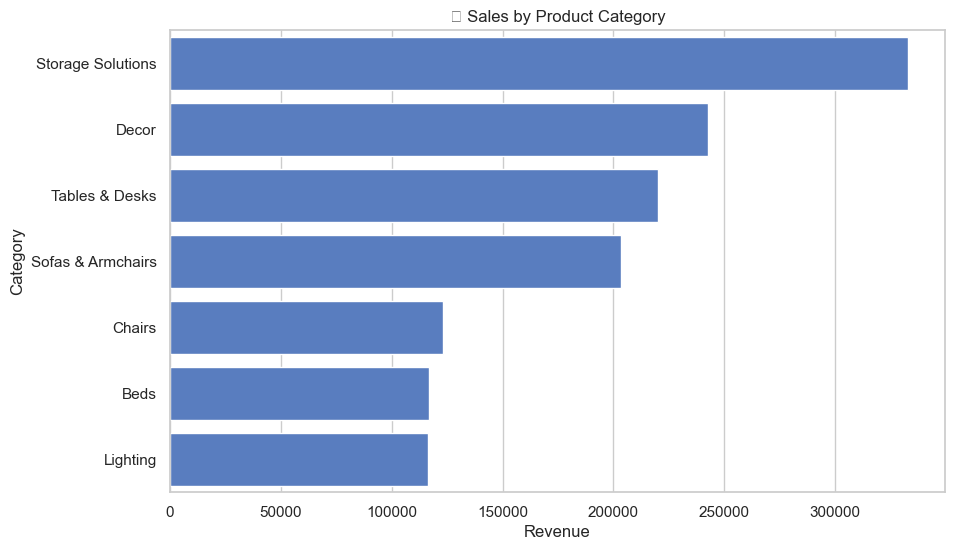

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


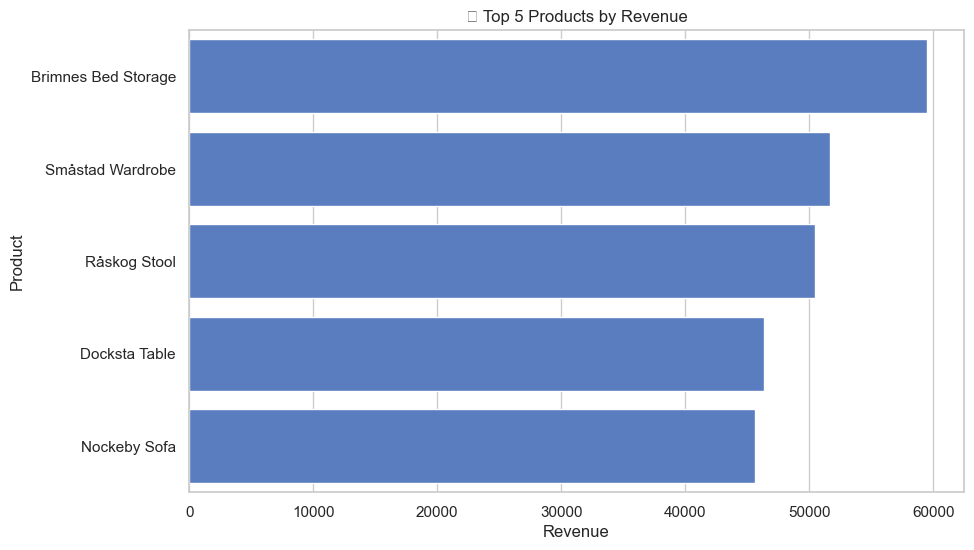

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


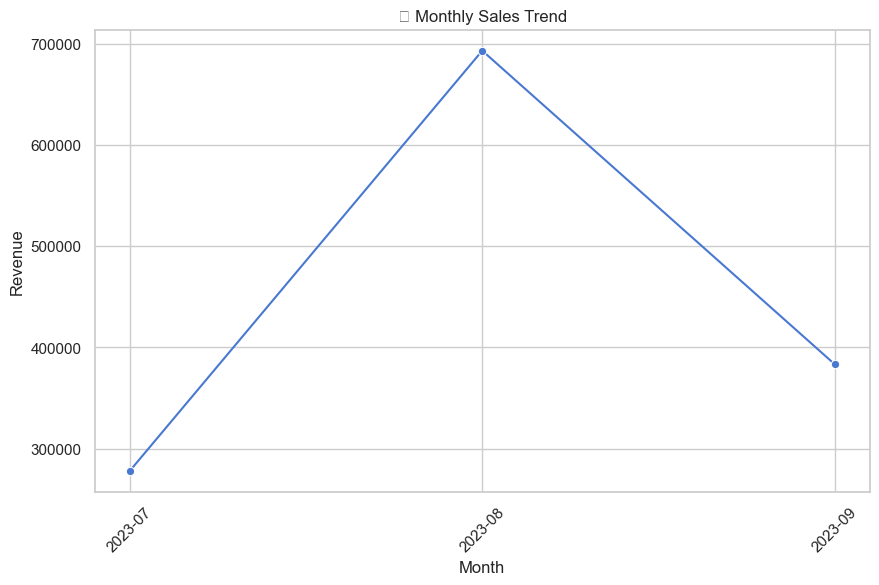

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


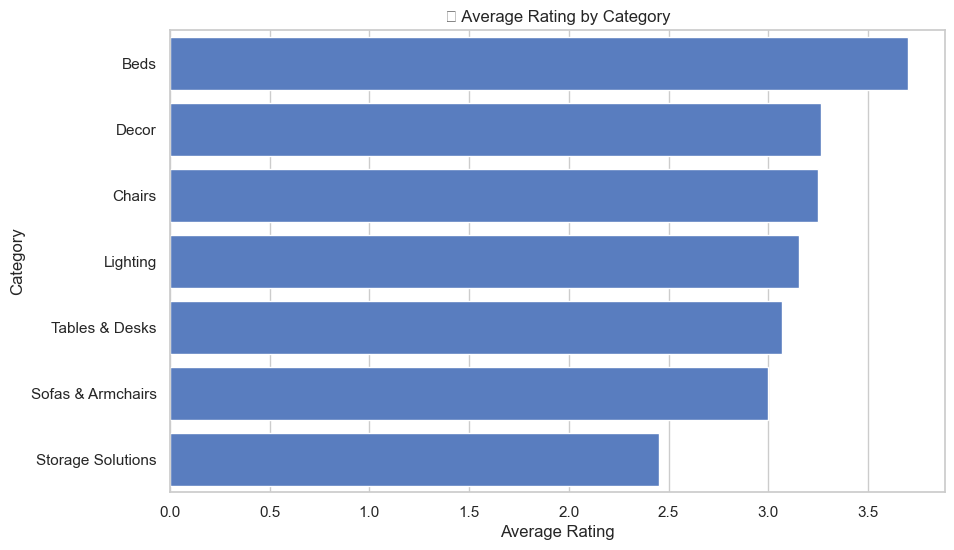

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


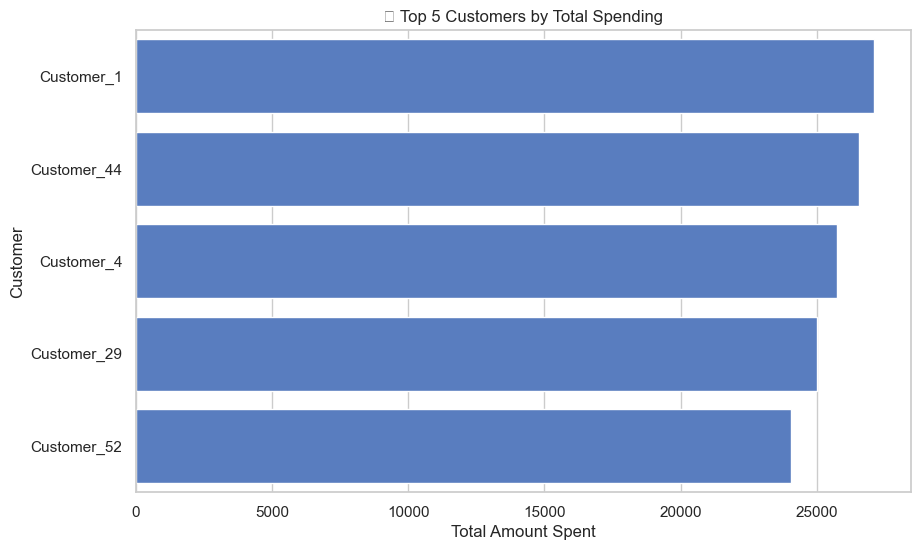

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


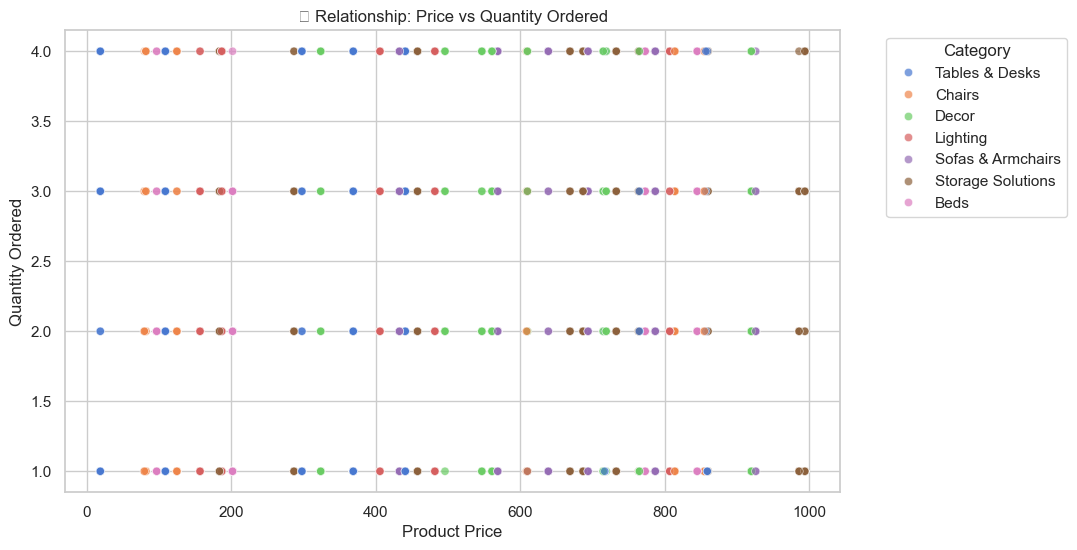

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


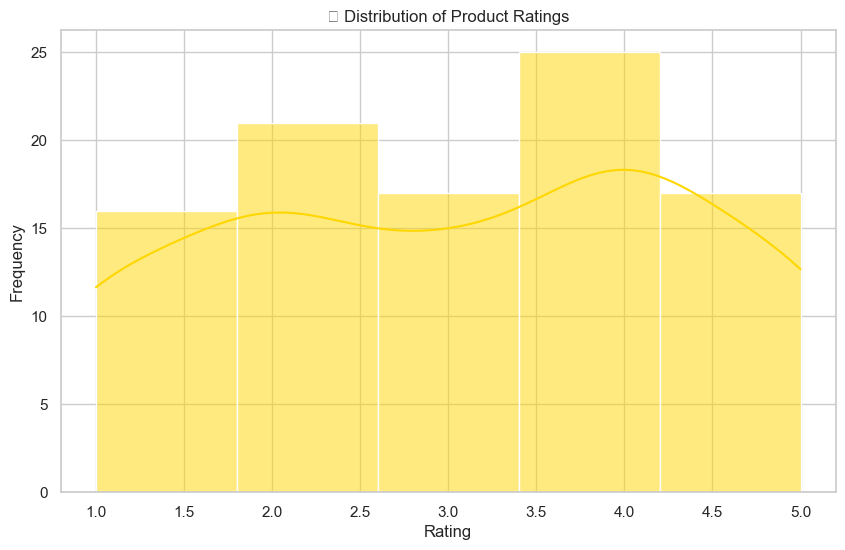


✅ Dashboard generated successfully!


In [ ]:
# --- Rating Distribution ---
plt.figure()
sns.histplot(orders_ratings["rating"].dropna(), bins=5, kde=True, color="gold")
plt.title("⭐ Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

print("\n✅ Dashboard generated successfully!")

In [2]:
from datetime import datetime

# CSVs are loaded already

# Merge orders with products to get prices
orders = pd.merge(orders, products[["product_id", "price"]], on="product_id", how="left")

# Add total amount for each order line
orders["total_amount"] = orders["price"] * orders["quantity"]

# Convert order_date to datetime
orders["order_date"] = pd.to_datetime(orders["order_date"])


In [3]:
# Use the latest order date in dataset as a reference point
reference_date = orders["order_date"].max() + pd.Timedelta(days=1)

# Aggregate per customer
rfm = orders.groupby("customer_id").agg({
    "order_date": lambda x: (reference_date - x.max()).days,  # Recency
    "order_id": "nunique",  # Frequency
    "total_amount": "sum"   # Monetary
}).reset_index()

# Rename columns for clarity
rfm.rename(columns={"order_date": "Recency", "order_id": "Frequency", "total_amount": "Monetary"}, inplace=True)


In [4]:
# Compute quantile-based scores
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])  # Lower recency → higher score
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

# Combine into one RFM Score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm

In [6]:
def segment_customer(row):
    if int(row["R_Score"]) >= 3 and int(row["F_Score"]) >= 3 and int(row["M_Score"]) >= 3:
        return "Champion"
    elif int(row["R_Score"]) >= 2 and int(row["F_Score"]) >= 3:
        return "Loyal Customer"
    elif int(row["M_Score"]) == 4:
        return "Big Spender"
    elif int(row["R_Score"]) <= 2:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)
rfm

C:\Users\umers\AppData\Local\Temp\ipykernel_19608\2718297129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Segment", data=rfm, order=rfm["Segment"].value_counts().index, palette="viridis")
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


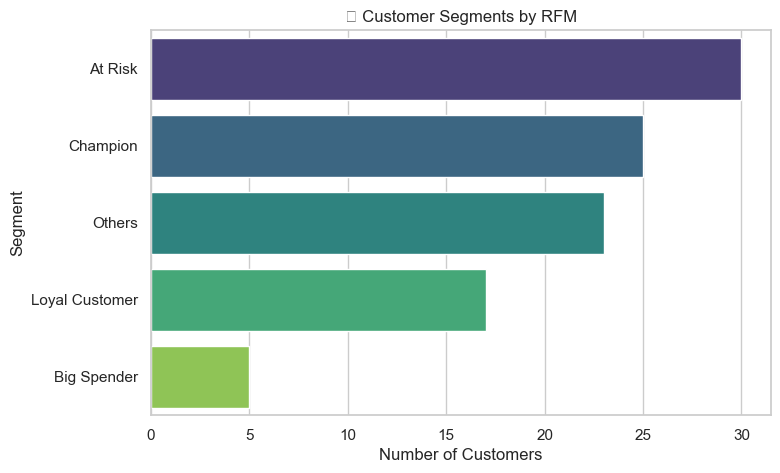

C:\Users\umers\AppData\Local\Temp\ipykernel_19608\2718297129.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(index="F_Score", columns="R_Score", values="Monetary", aggfunc="mean")
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


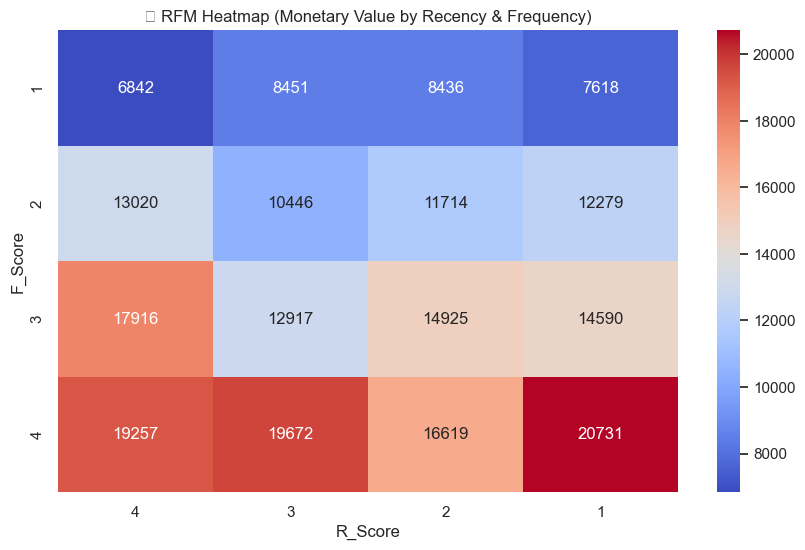

In [8]:
# Segment distribution
plt.figure(figsize=(8,5))
sns.countplot(y="Segment", data=rfm, order=rfm["Segment"].value_counts().index, palette="viridis")
plt.title("🧩 Customer Segments by RFM")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.show()


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


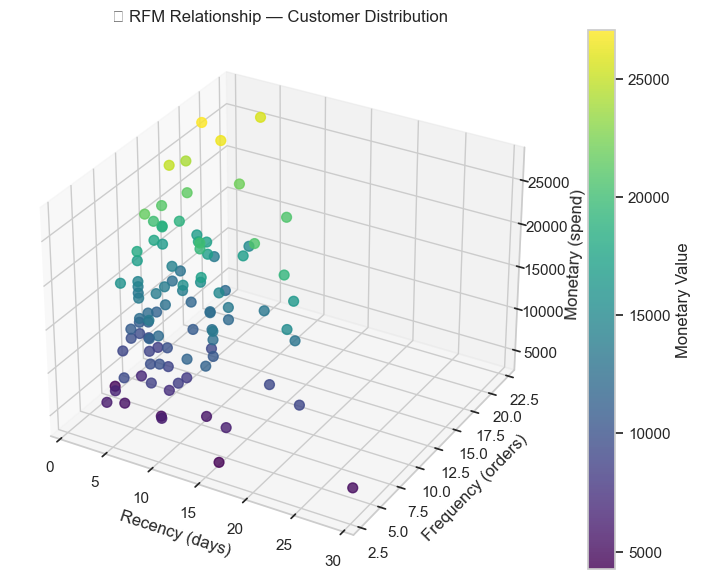

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm["Recency"], rfm["Frequency"], rfm["Monetary"],
                     c=rfm["Monetary"], cmap="viridis", s=50, alpha=0.8)

ax.set_xlabel("Recency (days)")
ax.set_ylabel("Frequency (orders)")
ax.set_zlabel("Monetary (spend)")
plt.title("💎 RFM Relationship — Customer Distribution")
fig.colorbar(scatter, ax=ax, label="Monetary Value")
plt.show()


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


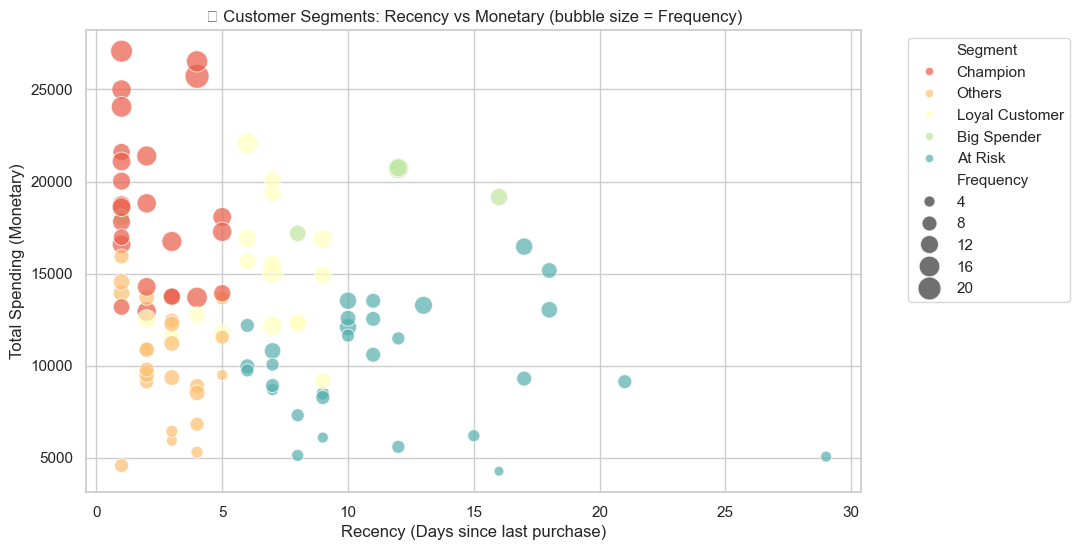

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Segment", size="Frequency",
                sizes=(50, 300), alpha=0.7, palette="Spectral")
plt.title("🧍 Customer Segments: Recency vs Monetary (bubble size = Frequency)")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Total Spending (Monetary)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


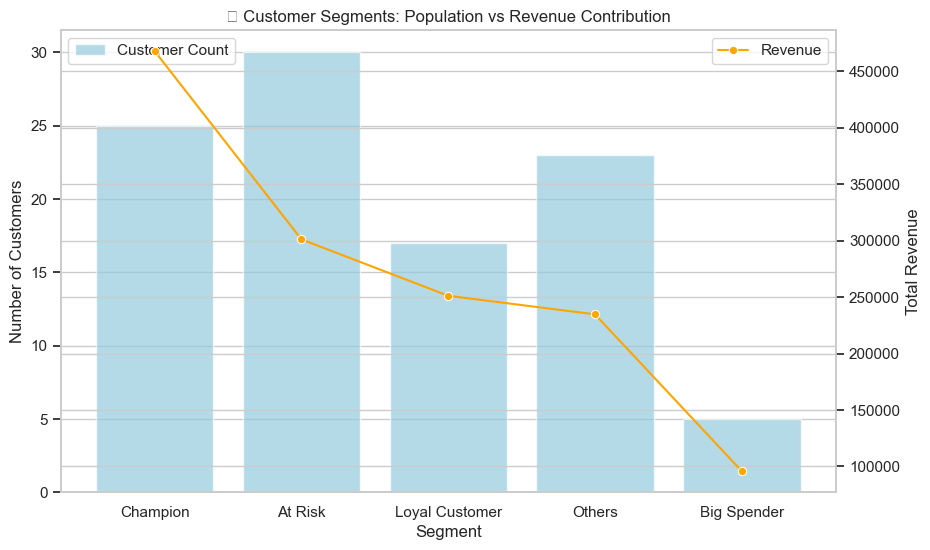

In [11]:
segment_summary = (
    rfm.groupby("Segment")
       .agg({"customer_id":"count", "Monetary":"sum"})
       .rename(columns={"customer_id":"Customer_Count", "Monetary":"Total_Revenue"})
       .sort_values("Total_Revenue", ascending=False)
       .reset_index()
)

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x="Segment", y="Customer_Count", data=segment_summary, ax=ax1, alpha=0.7, color="skyblue", label="Customer Count")
ax2 = ax1.twinx()
sns.lineplot(x="Segment", y="Total_Revenue", data=segment_summary, ax=ax2, color="orange", marker="o", label="Revenue")

ax1.set_ylabel("Number of Customers")
ax2.set_ylabel("Total Revenue")
plt.title("📊 Customer Segments: Population vs Revenue Contribution")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


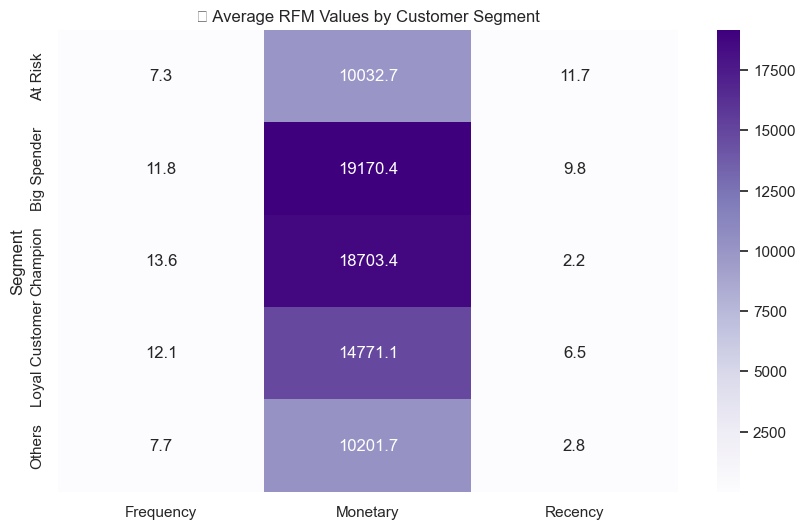

In [18]:
rfm_heat = rfm.pivot_table(index="Segment", values=["Recency","Frequency","Monetary"], aggfunc="mean")
sns.heatmap(rfm_heat, annot=True, fmt=".1f", cmap="Purples")
plt.title("🔥 Average RFM Values by Customer Segment")
plt.ylabel("Segment")
plt.show()
